# Analyse Exploratoire des Données (EDA) - Churn des Clients Bancaires

Ce notebook présente une analyse exploratoire des données pour identifier les facteurs influençant le churn des clients dans le secteur bancaire.
Le dataset contient diverses informations démographiques et comportementales des clients, ce qui nous permet d'explorer les caractéristiques
qui pourraient être pertinentes pour prédire le risque de churn.

## Chargement des données
Nous commençons par charger le dataset et examiner sa structure.


In [1]:
import pandas as pd
data = pd.read_csv('Customer_churn.csv')
data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


## Aperçu des caractéristiques

Nous examinons les types de données et vérifions s'il y a des valeurs manquantes dans le dataset.


In [2]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


## Statistiques descriptives des variables numériques

Cette section présente un résumé statistique des variables numériques pour mieux comprendre leurs distributions.


In [3]:
data.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


## Analyse des distributions des variables

Nous examinons les distributions des variables numériques et catégorielles pour identifier des tendances qui pourraient influencer le churn.


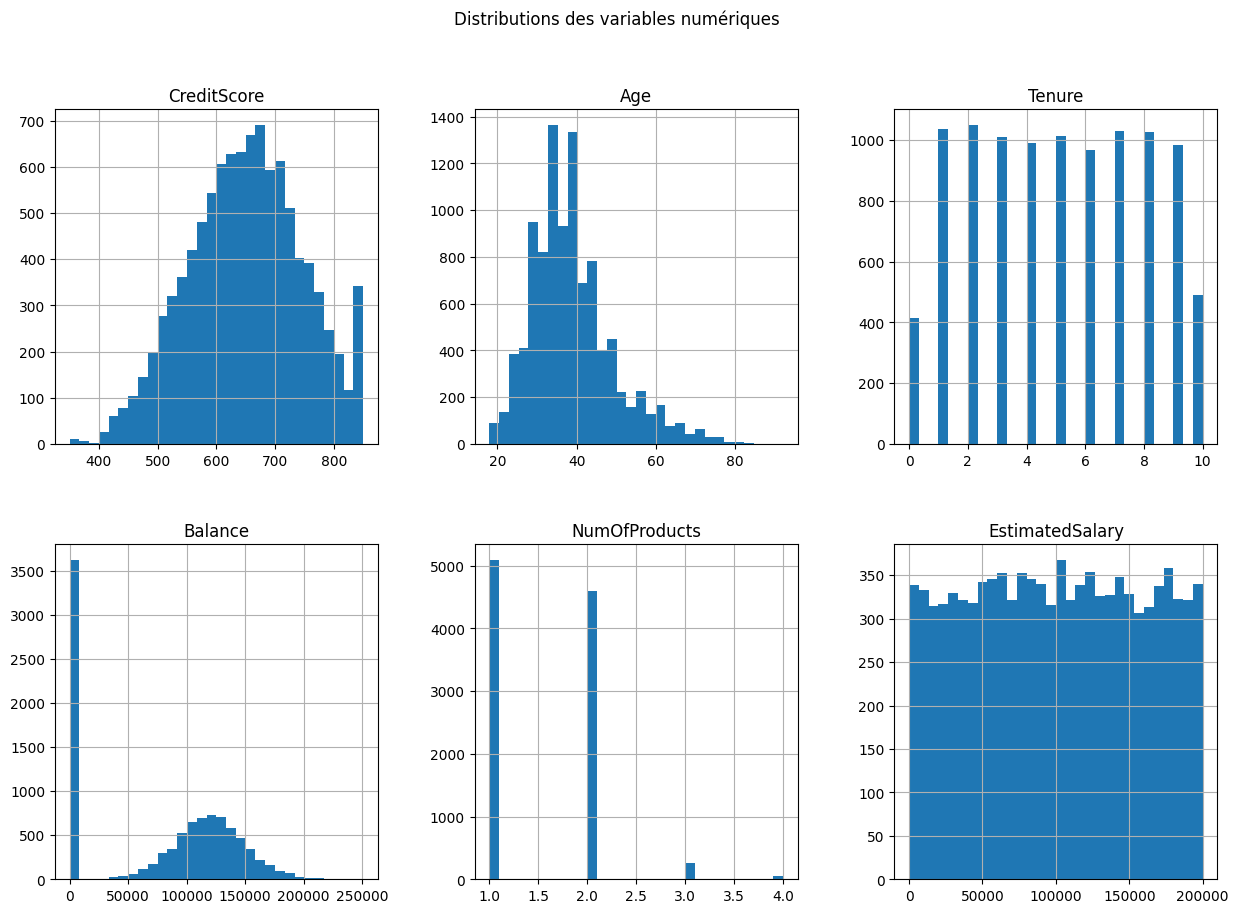

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

# Visualisation des distributions pour les variables numériques
num_cols = ['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'EstimatedSalary']
data[num_cols].hist(bins=30, figsize=(15, 10), layout=(2, 3))
plt.suptitle('Distributions des variables numériques')
plt.show()


## Analyse du churn par variable

Nous analysons le churn en fonction de différentes caractéristiques pour identifier les facteurs potentiels qui influencent le départ des clients.


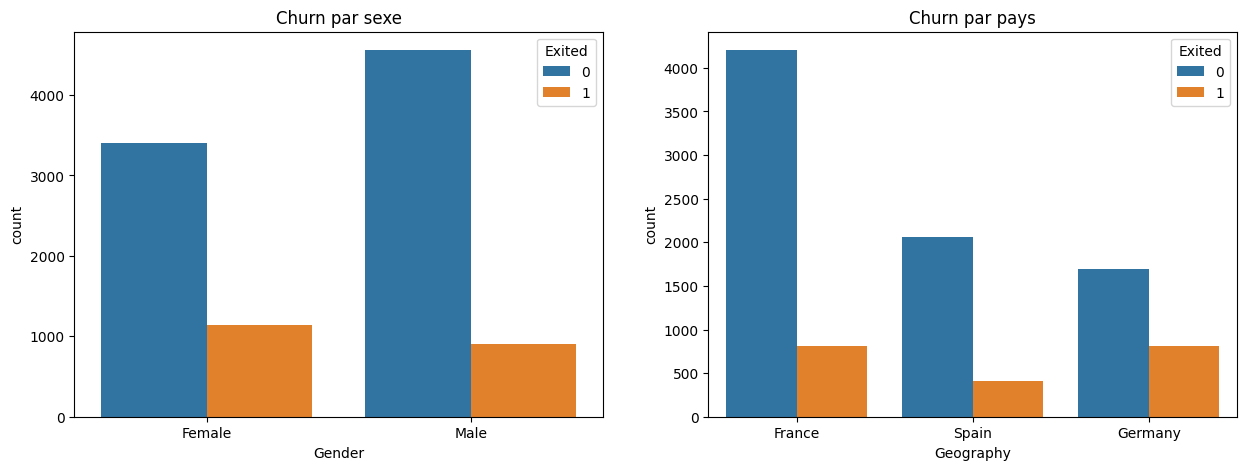

In [5]:
# Analyse du churn par sexe et pays
fig, axes = plt.subplots(1, 2, figsize=(15, 5))
sns.countplot(x='Gender', hue='Exited', data=data, ax=axes[0])
axes[0].set_title('Churn par sexe')
sns.countplot(x='Geography', hue='Exited', data=data, ax=axes[1])
axes[1].set_title('Churn par pays')
plt.show()


## Matrice de corrélation

Nous visualisons la corrélation entre les variables numériques pour comprendre les relations potentielles qui pourraient influencer le churn.


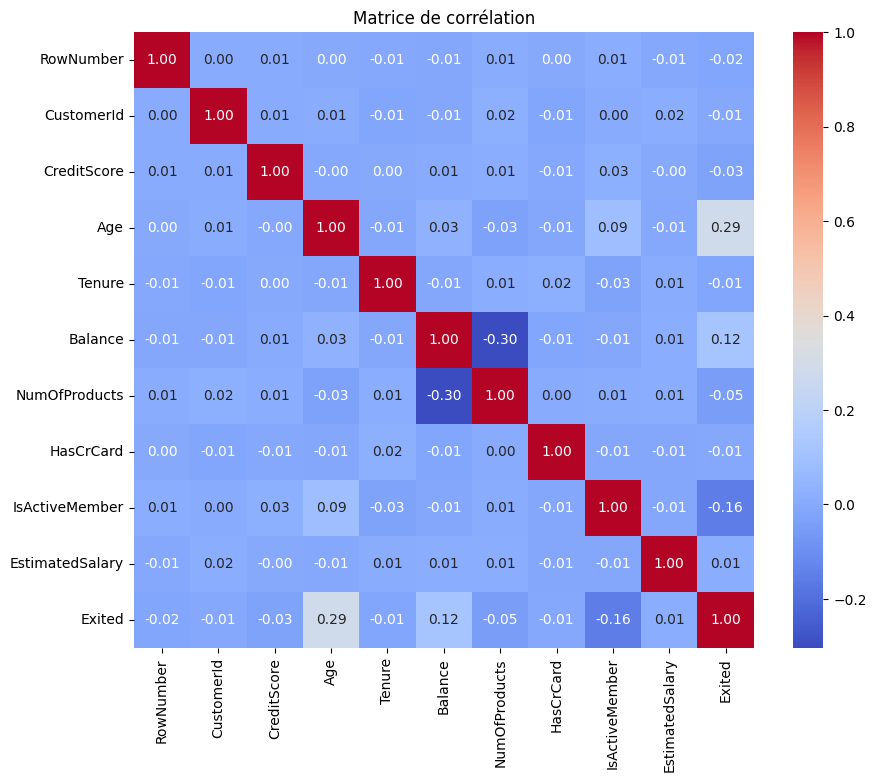

In [7]:
plt.figure(figsize=(10, 8))
sns.heatmap(data.select_dtypes(include=['float64', 'int']).corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matrice de corrélation')
plt.show()
